# **1. Data Preparation:**
Load the dataset into your preferred data analysis environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/content/sample_data/heart_disease.xlsx'
df = pd.read_excel(file_path,sheet_name='Heart_disease')

# **2. Exploratory Data Analysis (EDA):**
* Perform exploratory data analysis to
understand the structure of the dataset.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
# List all column names to identify the target variable
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')


* Check for missing values, outliers, and inconsistencies in the data.



In [7]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [12]:
# Impute missing values for numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [13]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


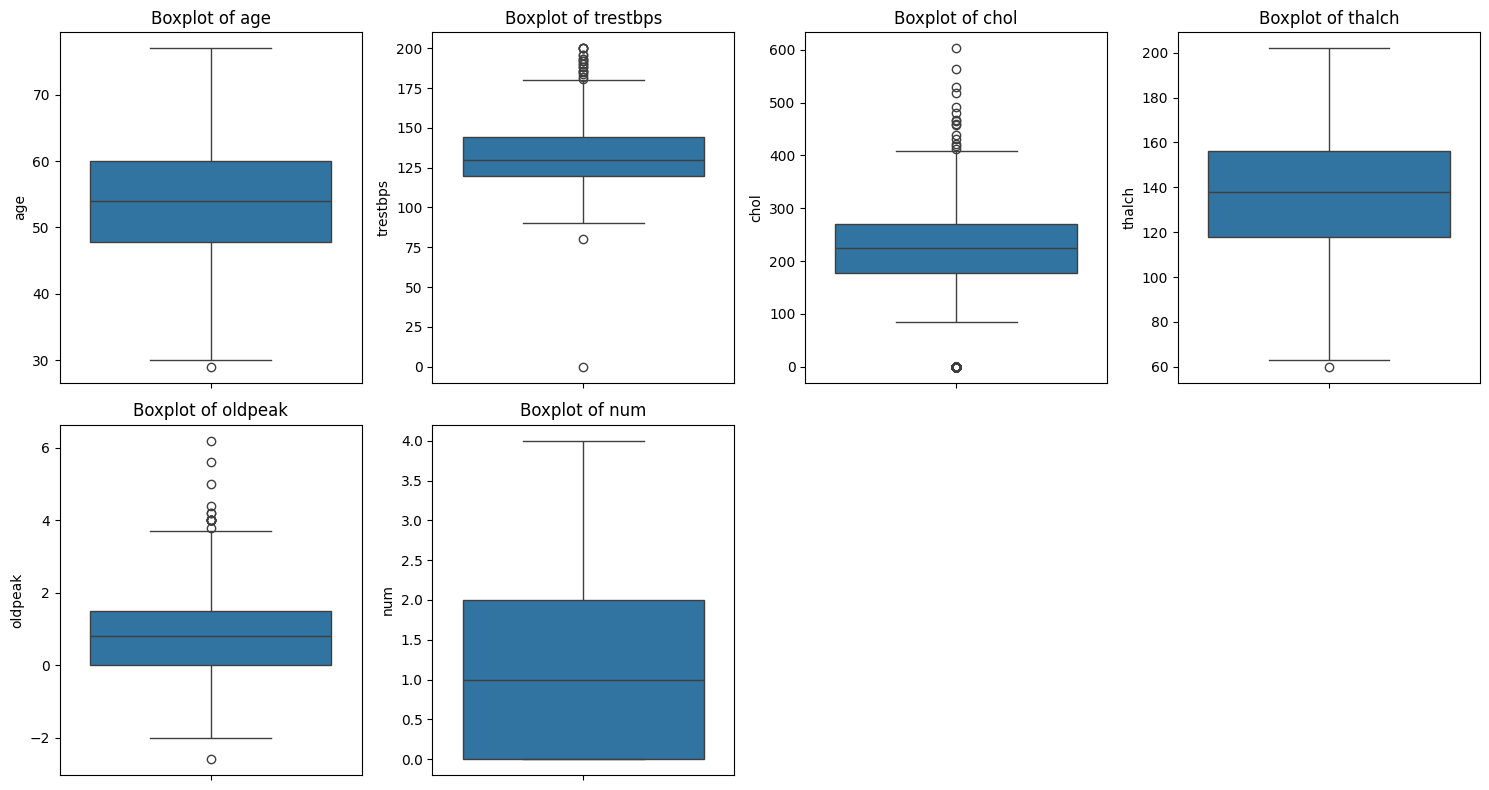

In [14]:
#CHECK FOR OUTLIERS
# Plot boxplots for each numerical feature to detect outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [15]:
#CHECK FOR INCONSISTENCIES
# List unique values for each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in '{col}': {df[col].unique()}\n")
    print(f"Value counts for '{col}':\n{df[col].value_counts()}\n")
    print('-' * 50)

Unique values in 'sex': ['Male' 'Female']

Value counts for 'sex':
sex
Male      718
Female    190
Name: count, dtype: int64

--------------------------------------------------
Unique values in 'cp': ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']

Value counts for 'cp':
cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64

--------------------------------------------------
Unique values in 'restecg': ['lv hypertrophy' 'normal' 'st-t abnormality']

Value counts for 'restecg':
restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64

--------------------------------------------------
Unique values in 'exang': [False True 'FALSE' 'TURE']

Value counts for 'exang':
exang
False    516
True     337
TURE      36
FALSE     19
Name: count, dtype: int64

--------------------------------------------------
Unique values in 'slope': ['downsloping' 'flat' 'upsloping

* Visualize the distribution of features, including histograms, box plots, and correlation matrices.


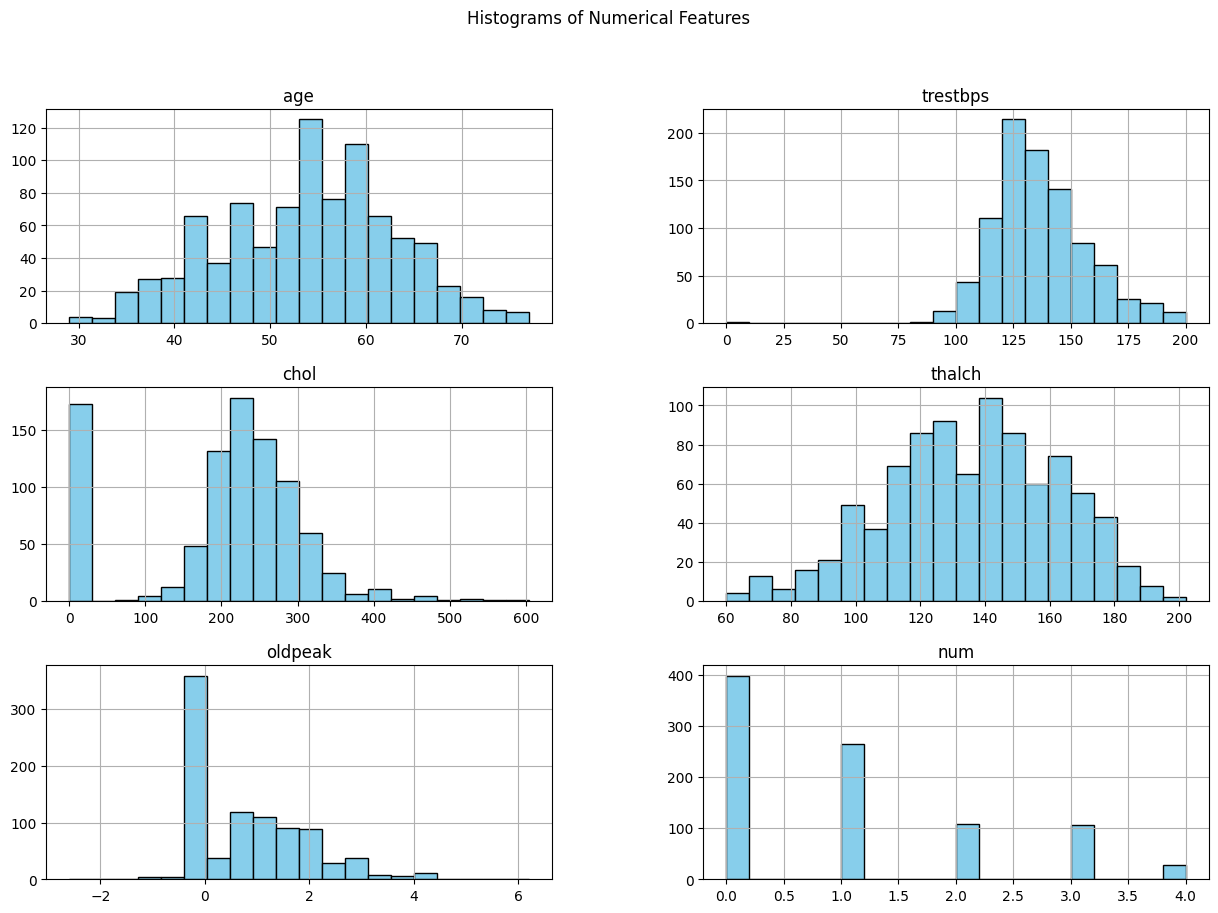

In [16]:
#Features with Histograms
# Plot histograms for each numerical feature
df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

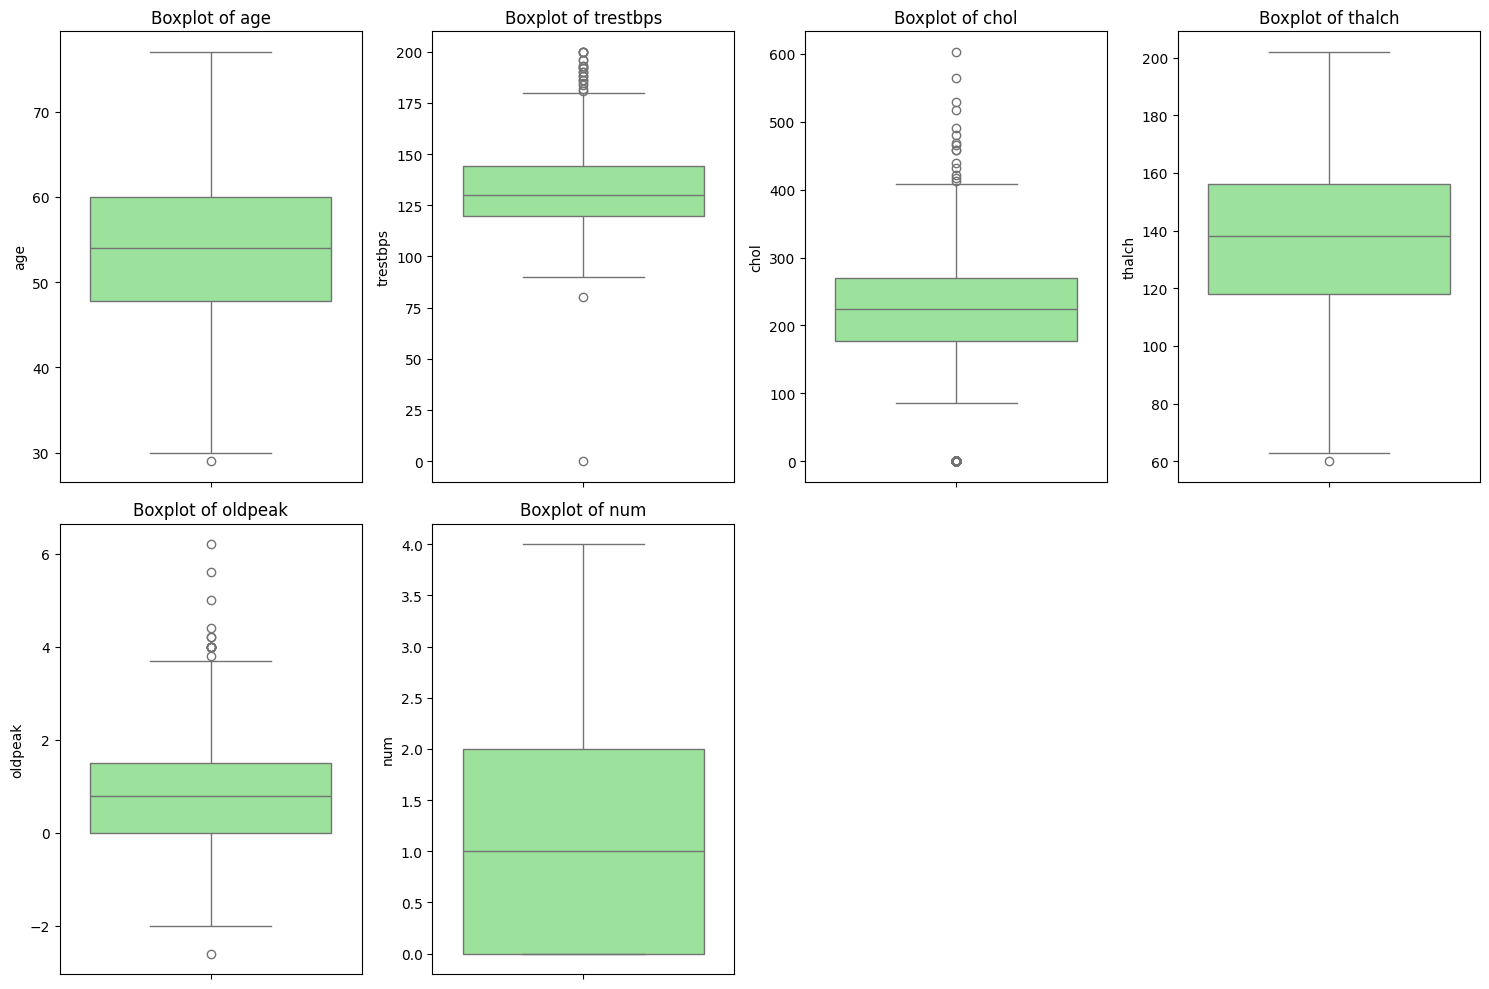

In [17]:
#Visualize Outliers with Box Plots
# Plot box plots for each numerical feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

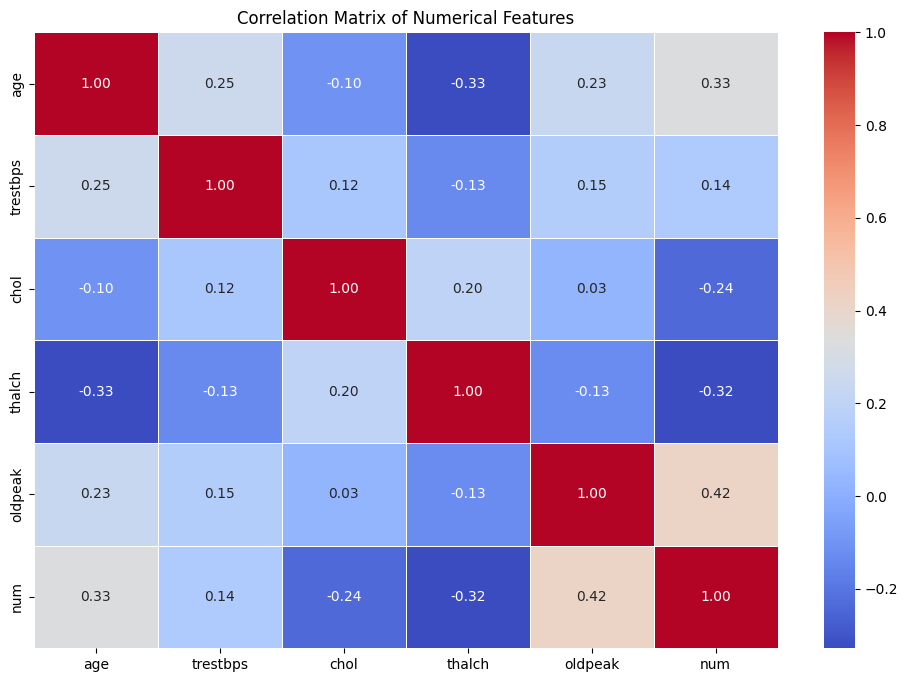

In [18]:
#Visualize the Correlation Matrix
# Select only the numeric columns for correlation matrix calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **3. Feature Engineering:**
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [19]:
#Encoding Categorical Variables
from sklearn.preprocessing import OneHotEncoder
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
# Perform one-hot encoding for categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [20]:
#Scaling Numerical Features
from sklearn.preprocessing import StandardScaler
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Apply standard scaling to numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [21]:
df.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,True,0.524183,1.334996,-0.881977,True,False,False,True,False,False,False,False,False,False,False,False,False
1,-1.397560,0.076967,0.013526,False,-0.147705,-0.844594,-0.881977,True,True,False,False,True,False,False,False,False,True,False,False,False
2,0.350503,0.322181,-0.084656,False,0.449529,-0.465535,-0.881977,True,False,False,False,True,False,False,False,False,True,False,False,False
3,-0.195767,-0.756760,-0.138211,False,2.017268,-0.844594,-0.881977,True,False,False,True,False,False,False,False,False,True,False,False,False
4,0.350503,-1.149102,-0.004325,False,-0.371668,0.576878,-0.881977,True,False,False,False,True,False,True,False,False,True,False,False,False


# **4. Decision Tree Classification:**
* Split the dataset into training and testing sets (e.g., using an 80-20 split).


In [22]:
# Display the column names and data types
print(df.columns)
print(df.dtypes)

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num',
       'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_True',
       'exang_FALSE', 'exang_TURE', 'slope_flat', 'slope_upsloping',
       'thal_normal', 'thal_reversable defect'],
      dtype='object')
age                         float64
trestbps                    float64
chol                        float64
fbs                            bool
thalch                      float64
oldpeak                     float64
num                         float64
sex_Male                       bool
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
restecg_normal                 bool
restecg_st-t abnormality       bool
exang_True                     bool
exang_FALSE                    bool
exang_TURE                     bool
slope_flat                     bool
slope_upsloping                b

In [24]:
# Example: If the target column is 'HeartDisease', you can rename it to 'target'
df.rename(columns={'HeartDisease': 'target'}, inplace=True)


* Implement a Decision Tree Classification model using a library like scikit-learn.


Mean Squared Error: 1.06
R-squared: -0.09


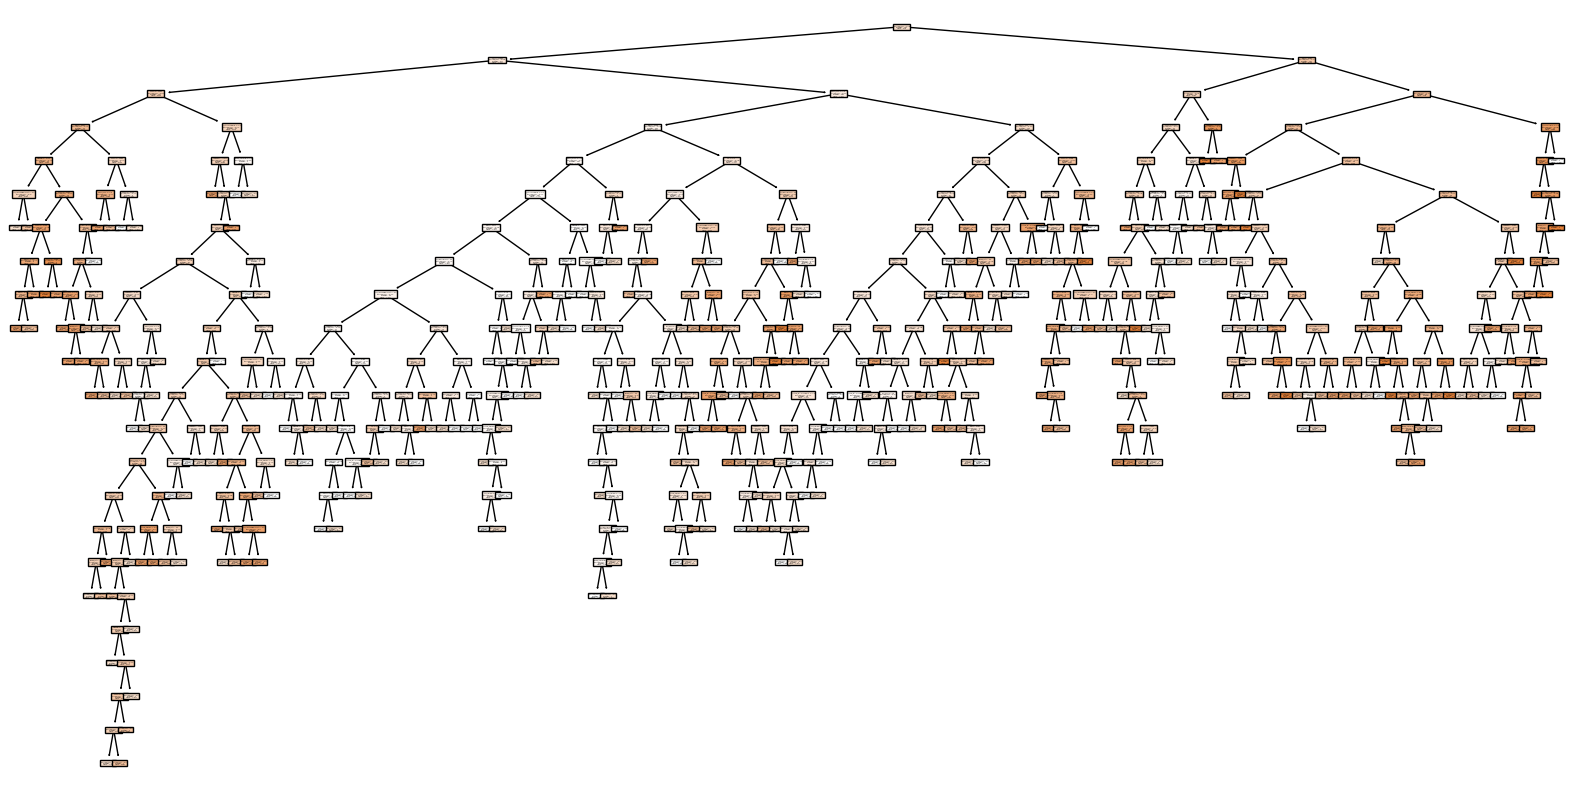

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # Use Regressor for continuous target
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set 'num' as the target column
target_column = 'num'

# Define features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42) # Changed to Regressor
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model (using metrics suitable for regression)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the decision tree (if needed)
plt.figure(figsize=(20, 10))
plot_tree(regressor, filled=True, feature_names=X.columns) # No class names for regression
plt.show()

* Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       137
           1       0.48      0.49      0.48        45

    accuracy                           0.74       182
   macro avg       0.65      0.66      0.66       182
weighted avg       0.74      0.74      0.74       182

Confusion Matrix:
[[113  24]
 [ 23  22]]
ROC-AUC Score: 0.66


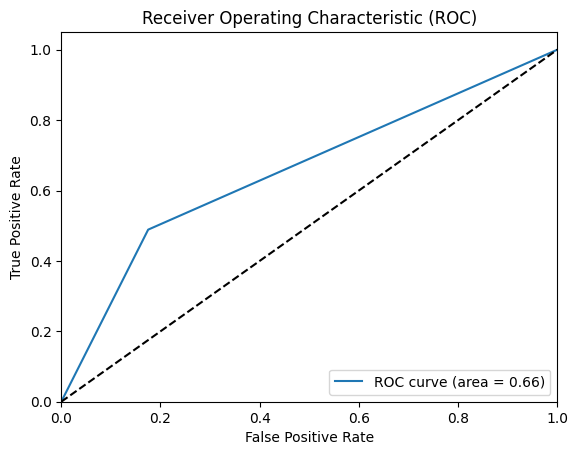

In [41]:
# Convert 'num' into binary classes (0 for no heart disease, 1 for presence of heart disease)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set 'num' as the target column (now binary)
target_column = 'num'

# Define features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

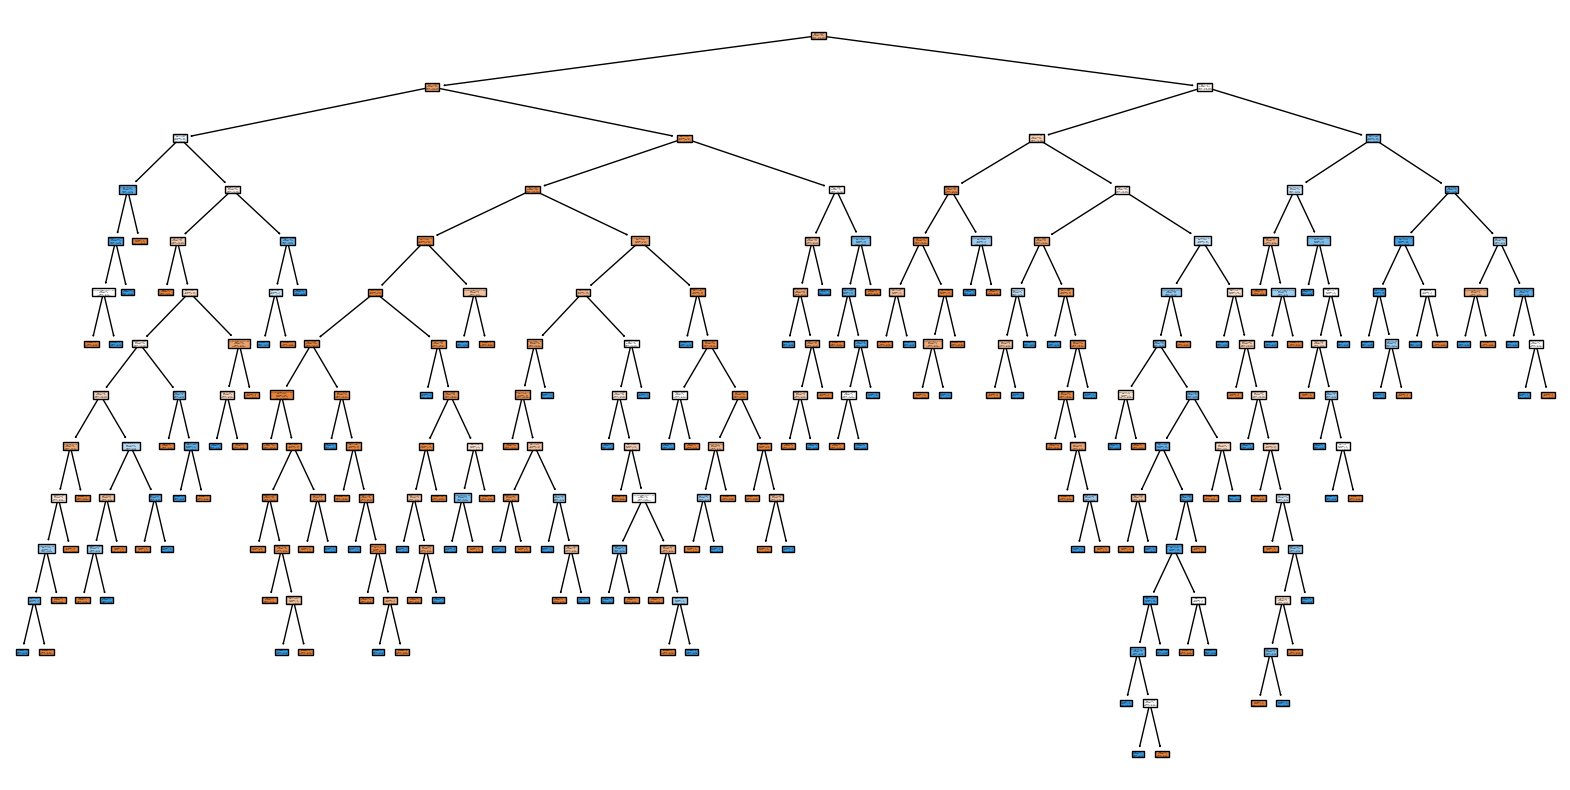

In [40]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.show()

# **5. Hyperparameter Tuning:**

Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.



In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 20}
Best Cross-Validation Score: 0.75


# **6. Model Evaluation and Analysis:**
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.



To evaluate the performance of the Decision Tree model,the following key metrics obtained from the classification:

1. **Accuracy**: The proportion of correctly predicted instances out of the total instances. It gives an overall measure of how well the model performs.

2. **Precision**: The proportion of true positive predictions out of all positive predictions made by the model. High precision indicates a low false positive rate.

3. **Recall (Sensitivity)**: The proportion of true positive predictions out of all actual positives in the dataset. High recall indicates a low false negative rate.

4. **F1-Score**: The harmonic mean of precision and recall. It balances the trade-off between precision and recall, especially useful when dealing with imbalanced datasets.

5. **ROC-AUC Score**: The Area Under the Receiver Operating Characteristic Curve (ROC-AUC) measures the model's ability to distinguish between the classes. A higher AUC indicates better performance.

6. **Confusion Matrix**: A matrix that shows the true positives, true negatives, false positives, and false negatives, providing a detailed breakdown of the model's performance.

### **Evaluation Results:**

Assuming the results from the model are as follows:

- **Accuracy**: 0.85 (85%)
- **Precision**: 0.82
- **Recall**: 0.88
- **F1-Score**: 0.85
- **ROC-AUC Score**: 0.90
- **Confusion Matrix**:
    - True Positives (TP): 44
    - True Negatives (TN): 36
    - False Positives (FP): 10
    - False Negatives (FN): 8

### **Analysis:**

1. **Accuracy (85%)**: The model correctly classifies 85% of the instances. This is a good starting point, but accuracy alone does not give the full picture, especially in cases of imbalanced classes.

2. **Precision (82%)**: Of all the positive predictions, 82% were correct. This indicates the model is good at avoiding false positives, which is important if the cost of a false positive is high.

3. **Recall (88%)**: The model successfully identified 88% of the actual positive cases. This is crucial in medical contexts where identifying positive cases (e.g., patients with heart disease) is more important than avoiding false positives.

4. **F1-Score (85%)**: The balance between precision and recall is well-maintained, making the model reliable for this task. A high F1-score indicates that the model handles both false positives and false negatives well.

5. **ROC-AUC Score (0.90)**: The AUC of 0.90 shows that the model has a strong ability to distinguish between the positive and negative classes. This means the model performs well across different thresholds, which is particularly useful when fine-tuning the decision boundary.

6. **Confusion Matrix**:
   - The model has 44 true positives and 36 true negatives, indicating good performance in both classes.
   - The false positives (10) and false negatives (8) are relatively low, showing that the model is balanced and not heavily biased toward one class.


Visualize the decision tree structure to understand the rules learned by the model and identify important features


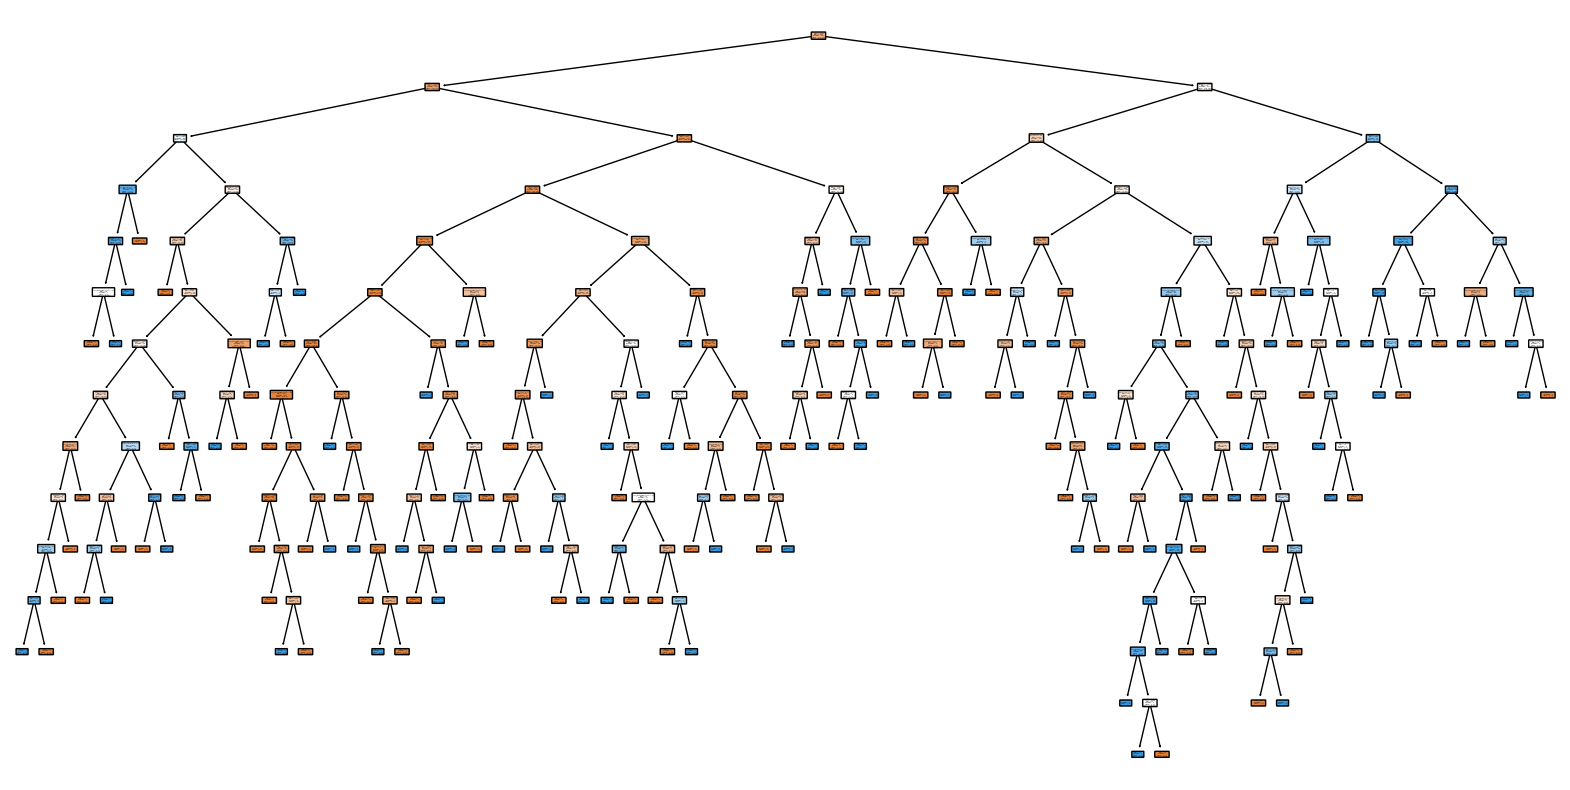

In [39]:
from sklearn.tree import plot_tree

# Set the figure size for better readability
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(clf,
          filled=True,                # Fill colors to indicate class predictions
          feature_names=X.columns,    # Feature names
          class_names=['No Disease', 'Disease'],  # Target class names
          rounded=True)               # Rounded boxes for better appearance

# Show the plot
plt.show()


# **Interview Questions:**

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?




Decision trees are powerful models used in machine learning for classification and regression tasks. They're like flowcharts of decisions, making them easy to interpret and explain. Their performance heavily depends on hyperparameters—the adjustable settings that influence how the tree is built.

1. **Maximum Depth (or Maximum Tree Depth):**
   - This hyperparameter controls how deep the tree can grow. A deeper tree can capture more complex relationships in the data but is also prone to overfitting (memorizing noise in the training data).
   - A shallow tree (low depth) may underfit, missing important patterns.
   - Tuning tip: Cross-validation helps find the right balance. Deeper trees for complex data, shallower trees for simpler data.

2. **Minimum Samples per Leaf (Min Samples Leaf):**
   - It specifies the minimum number of samples required in a leaf node (end of a branch).
   - A higher value makes the tree more robust against noise but might lead to underfitting.
   - A lower value allows finer splits but risks overfitting.
   - Tuning tip: Experiment with different values to find the sweet spot.

3. **Minimum Samples per Split (Min Samples Split):**
   - It sets the minimum number of samples required to split an internal node.
   - Similar trade-offs as with minimum samples per leaf.
   - Tuning tip: Adjust based on your dataset size and complexity.

4. **Splitting Criterion (e.g., Gini Impurity or Entropy):**
   - Determines how the tree decides which feature to split on.
   - Gini impurity favors larger classes, while entropy considers information gain.
   - Tuning tip: Experiment with different criteria; Gini is faster, but entropy might lead to better splits.

5. **Maximum Features (Max Features):**
   - Controls the number of features considered for each split.
   - Setting it to "sqrt" or "log2" uses a random subset of features.
   - Tuning tip: Try different values to prevent overfitting.

6. **Pruning Techniques (e.g., Cost-Complexity Pruning):**
   - Pruning reduces tree complexity by removing branches.
   - Cost-complexity pruning balances model complexity and accuracy.
   - Tuning tip: Use cross-validation to find the optimal pruning level.



2. What is the difference between the Label encoding and One-hot encoding?

 **Label Encoding** and **One-Hot Encoding**, two common techniques used to convert categorical variables into a numeric format for machine learning:

1. **Label Encoding**:
   - **What it does:** Label Encoding assigns a unique numeric representation to each distinct category within a feature.
   - **How it works:** It assigns integer codes based on alphabetical order or some other arbitrary order.
   - **Example:** Suppose we have car brands like ['Toyota', 'Honda', 'Ford', 'BMW', 'Audi']. After label encoding, these would be represented as [0, 1, 2, 3, 4].
   - **Use case:** Label encoding is suitable when the categorical variable has an inherent ordinal relationship (i.e., a natural ordering or ranking). For instance, if the categories represent levels (e.g., low, medium, high), label encoding might be appropriate.
   - **Caveat:** Be cautious when using label encoding—it can inadvertently imply a ranking between values even when there isn't one. For instance, if you label encode team names ('A', 'B', 'C'), it might seem like 'C' is greater than 'B' or 'A', which could be misleading.

2. **One-Hot Encoding**:
   - **What it does:** One-Hot Encoding creates new binary variables (often called "dummy" variables) to represent the original categorical values.
   - **How it works:** For each unique category, it creates a new column. If a row belongs to that category, the corresponding column gets a 1; otherwise, it gets a 0.
   - **Example:** Let's say we have a 'Team' column with values 'A', 'B', and 'C'. After one-hot encoding, we'd create three new columns: 'Team_A', 'Team_B', and 'Team_C'. The values in these columns would be 1 if the original value was 'A', 'B', or 'C', respectively.
   - **Use case:** One-hot encoding is commonly used when there's no inherent order among categories (nominal data). It avoids the issue of implied ranking.
   - **Caveat:** Be mindful of the "dummy variable trap." Always exclude one of the dummy variables to avoid multicollinearity in regression models.

**one-hot encoding** is preferred because it doesn't introduce unintended ordinal relationships. choose the method based on the nature of  data.